In [2]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

dataPath = "data/paradigms/clean/"

with open(dataPath + "vocabulary.txt", "r") as f:
    vocabulary = f.readlines()

neutral_topic_mean = np.load("neutral_topic_mean.npy")
negative_topic_mean = np.load("negative_topic_mean.npy")
positive_topic_mean = np.load("positive_topic_mean.npy")
authors = pd.read_csv("authors.csv")
authors["name"]

decoder = pd.read_csv(dataPath +'id_name_para.csv', index_col=0)['Judge Name']


In [3]:
# @title Run this cell to create helper function for printing topics


def get_topics(
    neutral_mean, negative_mean, positive_mean, vocabulary, print_to_terminal=True
):
    num_topics, num_words = neutral_mean.shape
    words_per_topic = 10
    top_neutral_words = np.argsort(-neutral_mean, axis=1)
    top_negative_words = np.argsort(-negative_mean, axis=1)
    top_positive_words = np.argsort(-positive_mean, axis=1)
    topic_strings = []
    for topic_idx in range(num_topics):
        neutral_start_string = "Neutral  {}:".format(topic_idx)
        neutral_row = [
            vocabulary[word] for word in top_neutral_words[topic_idx, :words_per_topic]
        ]
        neutral_row_string = ", ".join(neutral_row)
        neutral_string = " ".join([neutral_start_string, neutral_row_string])

        positive_start_string = "Positive {}:".format(topic_idx)
        positive_row = [
            vocabulary[word] for word in top_positive_words[topic_idx, :words_per_topic]
        ]
        positive_row_string = ", ".join(positive_row)
        positive_string = " ".join([positive_start_string, positive_row_string])

        negative_start_string = "Negative {}:".format(topic_idx)
        negative_row = [
            vocabulary[word] for word in top_negative_words[topic_idx, :words_per_topic]
        ]
        negative_row_string = ", ".join(negative_row)
        negative_string = " ".join([negative_start_string, negative_row_string])

        if print_to_terminal:
            topic_strings.append(negative_string)
            topic_strings.append(neutral_string)
            topic_strings.append(positive_string)
            topic_strings.append("==========")
        else:
            topic_strings.append(
                "  \n".join([negative_string, neutral_string, positive_string])
            )

    if print_to_terminal:
        all_topics = "{}\n".format(np.array(topic_strings))
    else:
        all_topics = np.array(topic_strings)
    return all_topics

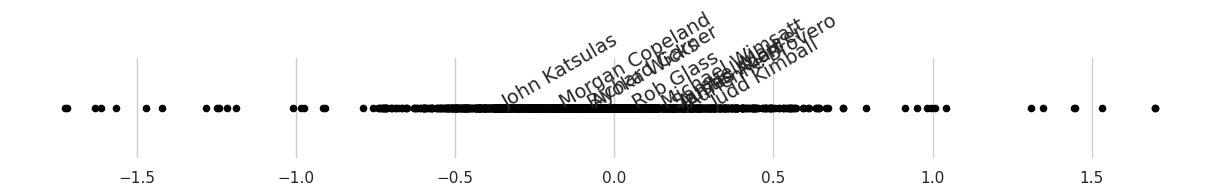

In [4]:
selected_authors = np.array(
    [
        "Rob Glass",
        "James Allan",
        "Michael Wimsatt",
        "Richard Garner",
        "Austin Koort",
        "Adrienne Brovero",
        "Nyx Moore",
        "Judd Kimball",
        "Ayoka Wicks",
        "Morgan Copeland",
        "John Katsulas",
        "Samuel Maurer"
    ]
)

sns.set(style="whitegrid")
fig = plt.figure(figsize=(12, 1))
ax = plt.axes([0, 0, 1, 1], frameon=False)
for index in range(authors.shape[0]):
    ax.scatter(authors["ideal_point"][index], 0, c="black", s=20)
    if decoder[authors["name"][index]] in selected_authors:
        ax.annotate(
            decoder[authors["name"][index]],
            xy=(authors["ideal_point"][index], 0.0),
            xytext=(authors["ideal_point"][index], 0),
            rotation=30,
            size=14,
        )
ax.set_yticks([])
plt.show()



In [5]:
authors.drop('Unnamed: 0', inplace=True, axis=1)
authors.sort_values('ideal_point', inplace=True)
authors.rename({'name':'Judge ID'}, axis=1, inplace=True)
authors.set_index('Judge ID', inplace=True)
authors = authors.merge(decoder, on='Judge ID')

In [6]:

authors.head(-20)

,ideal_point,Judge Name
Judge ID,,
508289,-1.727299,Lee Robinson
508296,-1.718477,Joseph Amoroso
34021,-1.632761,Isabella Minter
291187,-1.613843,Jeilyn Haynes
107418,-1.565523,Koi Kizzie
...,...,...
56122,0.608958,Ashe Tippins
254093,0.611204,Maxine Adams
9666,0.632637,Phoebe Kuo


In [7]:

topics = get_topics(neutral_topic_mean, positive_topic_mean, negative_topic_mean, vocabulary)
topics

"['Negative 0: paperless\\n, line\\n, community\\n, while\\n, activity\\n, particular\\n, resolution\\n, result\\n, overviews\\n, strategy\\n'\n 'Neutral  0: activity\\n, decision\\n, line\\n, community\\n, clash\\n, issues\\n, particular\\n, each\\n, role\\n, claims\\n'\n 'Positive 0: decision\\n, clash\\n, speeches\\n, decisions\\n, students\\n, usually\\n, persuasive\\n, role\\n, activity\\n, examples\\n'\n '=========='\n 'Negative 1: high school\\n, judged\\n, coached\\n, year\\n, now\\n, hs\\n, ndt\\n, haven\\n, went\\n, coach\\n'\n 'Neutral  1: high school\\n, ld\\n, stuff\\n, care\\n, coach\\n, year\\n, email chain\\n, judged\\n, coached\\n, now\\n'\n 'Positive 1: ld\\n, pf\\n, disclosure\\n, fw\\n, wiki\\n, phil\\n, speaks\\n, opponent\\n, traditional\\n, tricks\\n'\n '=========='\n 'Negative 2: thought\\n, counterplans\\n, legal\\n, persuasive\\n, counterplan\\n, seems\\n, may\\n, political\\n, defend\\n, question\\n'\n 'Neutral  2: fairness\\n, seems\\n, model\\n, fiat\\n, ki